In [10]:
from LCOE_calculator_830 import optimize_system, get_optimized_results, annual_performance_plots, plot_performance, parametric_plots, generate_and_plot_tornado_sensitivities, contour_plots

In [11]:
plant_location = 'Page, AZ'
load_int = 1e6
# scenario 1 - gridtied system

# decrease collector cap range, increase PV and csp
parametric_plots(load = load_int, plant_location = plant_location, gridtied = True, n_data_points = 13, csv_name = r'C:\Users\tljohn\gridtied_original_TES_scenario1_V_2.csv') 

# scenario 2 - isolated system
parametric_plots(load = load_int, plant_location = plant_location, gridtied = False, n_data_points = 13, csv_name = r'C:\Users\tljohn\gridtied_updated_TES_scenario2_V_2.csv')

In [25]:
import pandas as pd
import plotly.graph_objects as go

file_loc_scen1 = r"C:\Users\tljohn\scenario1_minvalues.csv"
file_loc_scen2 = r"C:\Users\tljohn\minvalues_scenario2.csv"
file_loc_scen3 = r"C:\Users\tljohn\gridtied_updated_TES_scenario3_V11_min_values.csv"
file_loc_scen4 = r"C:\Users\tljohn\isolated_scenario4_V11_min_values.csv"

s1_df = pd.read_csv(file_loc_scen1)
s2_df = pd.read_csv(file_loc_scen2)
s3_df = pd.read_csv(file_loc_scen3)
s4_df = pd.read_csv(file_loc_scen4)

target_load_met_percentages = list(range(0, 101, 2))

fig = go.Figure()

scenarios = {
    'Scenario 1': s1_df,
    'Scenario 2': s2_df,
}

for scenario_name, df in scenarios.items():
    selected_data = []
    
    for target in target_load_met_percentages:
        # find he index of closest load met percentage
        closest_index = (df['load_met_percentage'] - target).abs().idxmin()
        selected_data.append(df.iloc[closest_index])
    
   
    selected_df = pd.DataFrame(selected_data)

    fig.add_trace(go.Scatter(
        x=selected_df['load_met_percentage'],
        y=selected_df['LCOE'],
        mode='lines+markers',
        name=scenario_name,
        hoverinfo='text',
        text=(
            'Collector area (m2): ' + selected_df['collector_area'].astype(str) + '<br>' +
            'TES Capacity (Whth): ' + selected_df['tes_capacity'].astype(str) + '<br>' +
            'PV Capacity (W): ' + selected_df['pv_capacity'].astype(str) + '<br>' +
            'Max hourly TES output (Wh): ' + selected_df['maximum_hourly_tes_output'].astype(str) + '<br>' +
            'LCOE: ' + selected_df['LCOE'].astype(str) + '<br>' +
            'Load Met Percentage: ' + selected_df['load_met_percentage'].astype(str)
        )
    ))

fig.update_layout(
    title='Load Met Percentage vs LCOE',
    xaxis_title='Load Met Percentage',
    yaxis_title='Levelized Cost of Energy (LCOE)',
    legend_title='Scenarios',
    template='plotly_white'
)

fig.show()


In [2]:
plant_location = 'Page, AZ'
load_int = 1e6
# scenarios 1 and 2
parametric_plots(load = load_int, plant_location = plant_location, gridtied = True, n_data_points = 12, original_TES = True, csv_name = r'C:\Users\tljohn\gridtied_original_TES_scenarios1and2_V3.csv') 

Scenario 1
LCOE: 0.29 $/kWh
load met percentage: 99.63


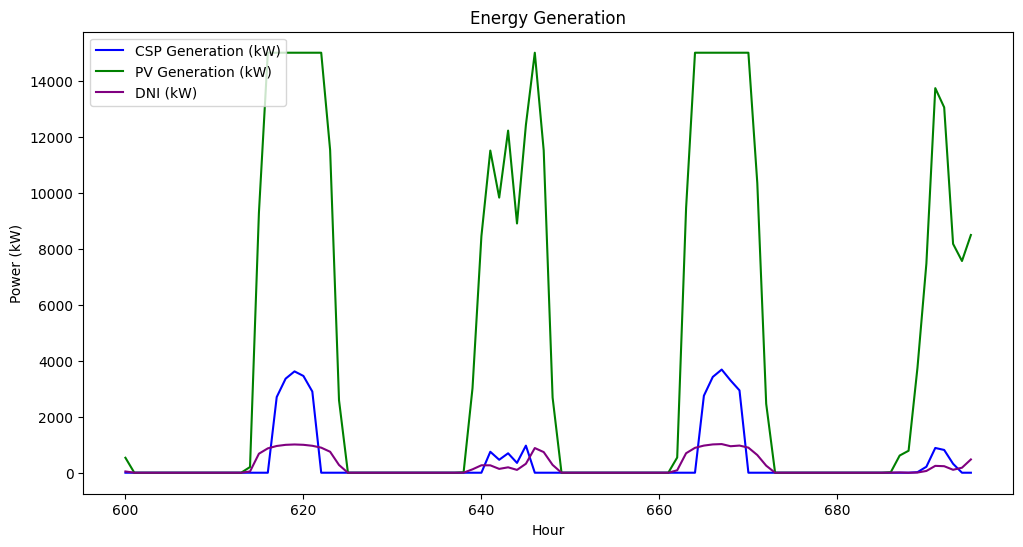

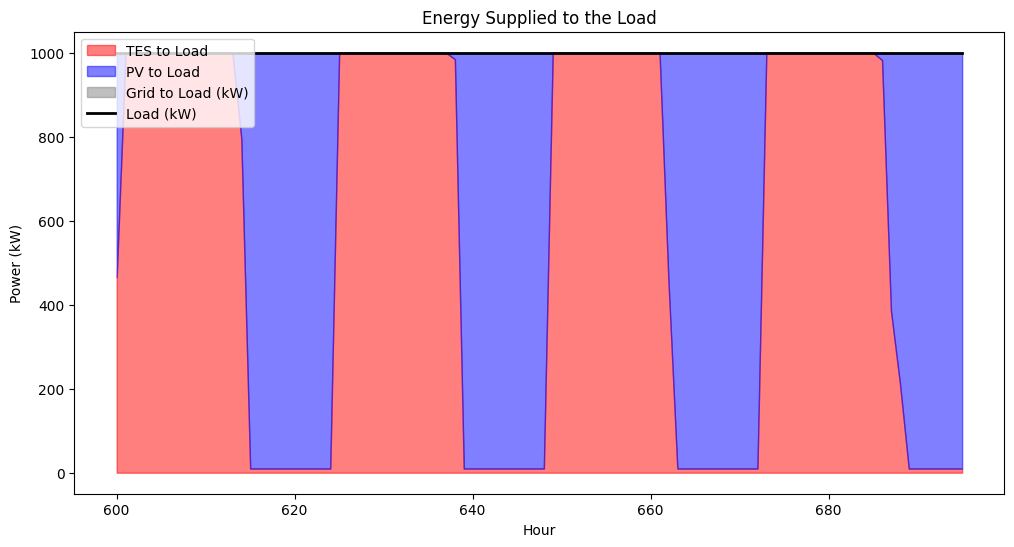

600


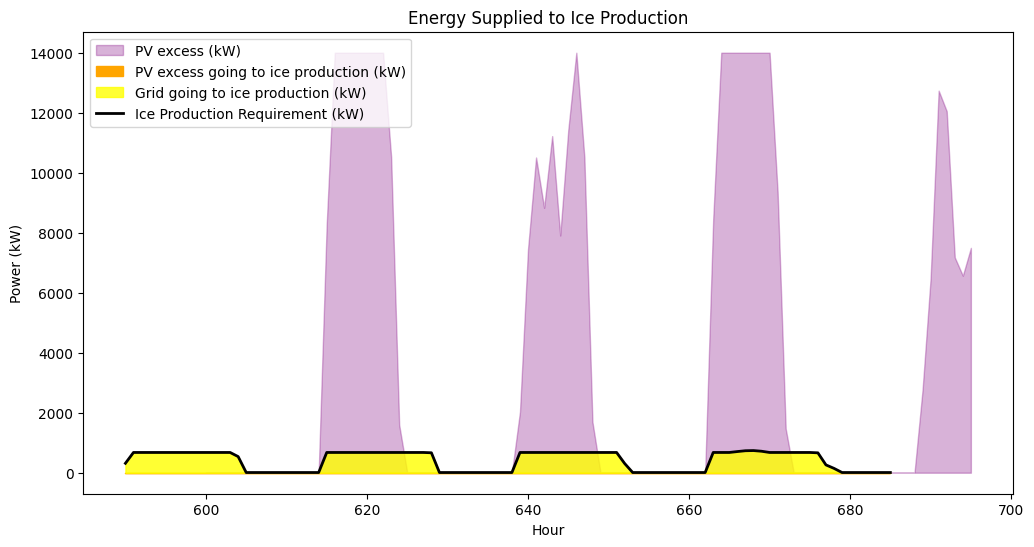

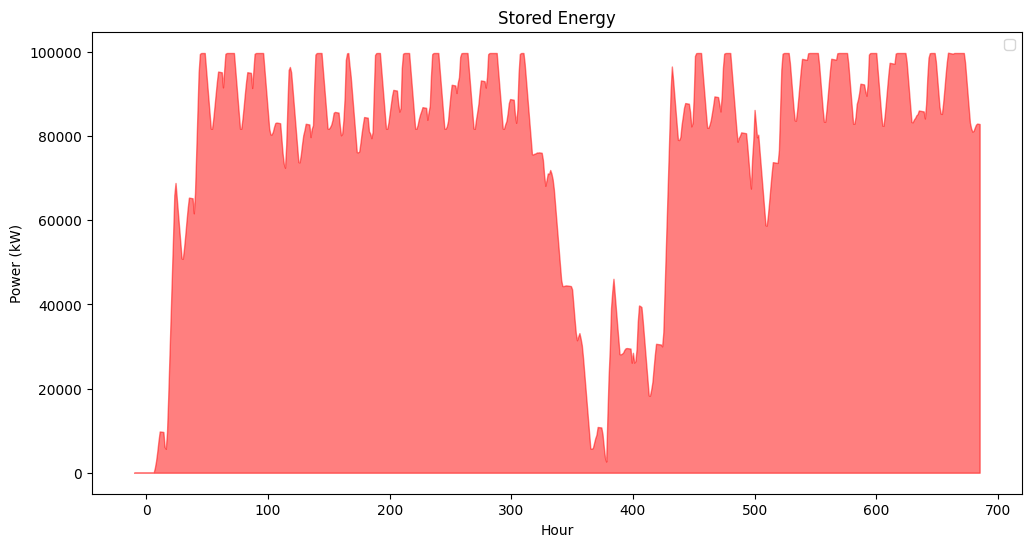

Scenario 2
LCOE: 0.28 $/kWh
load met percentage: 65.12


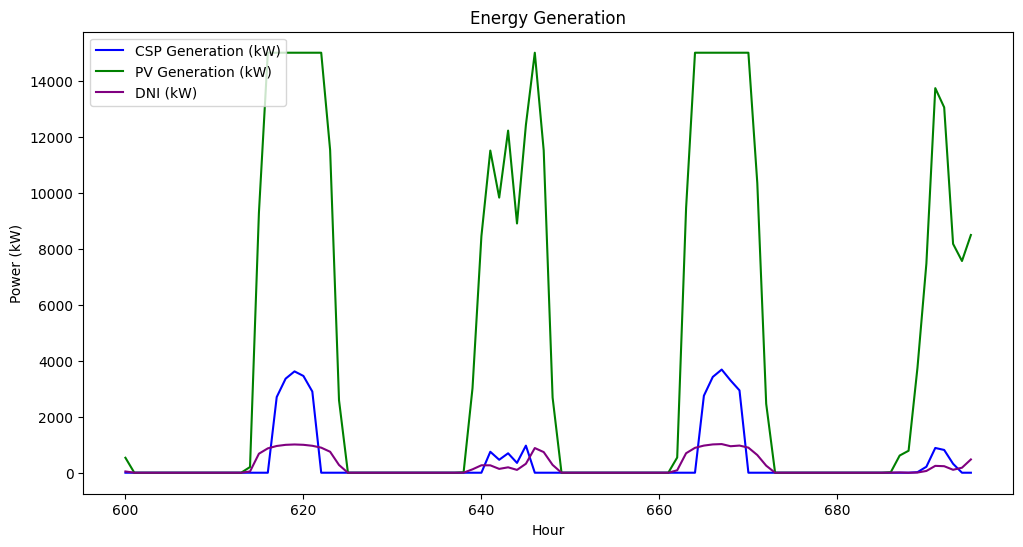

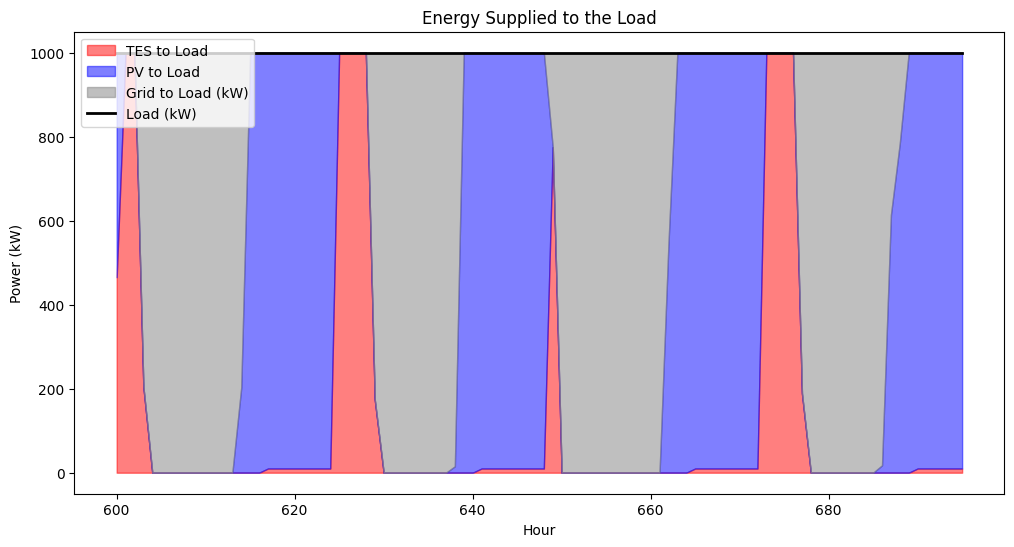

600


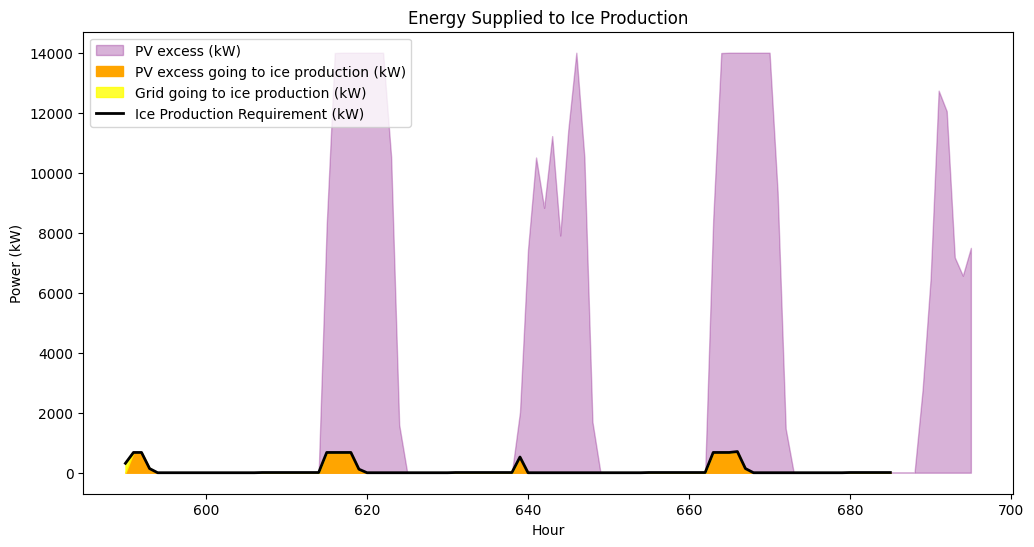

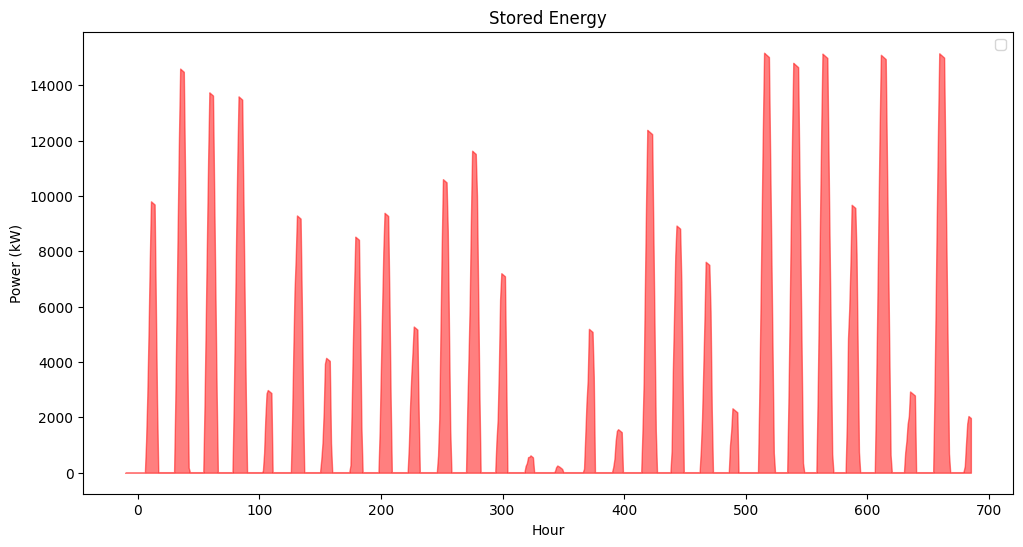

Scenario 3
LCOE: 0.27 $/kWh
load met percentage: 96.15


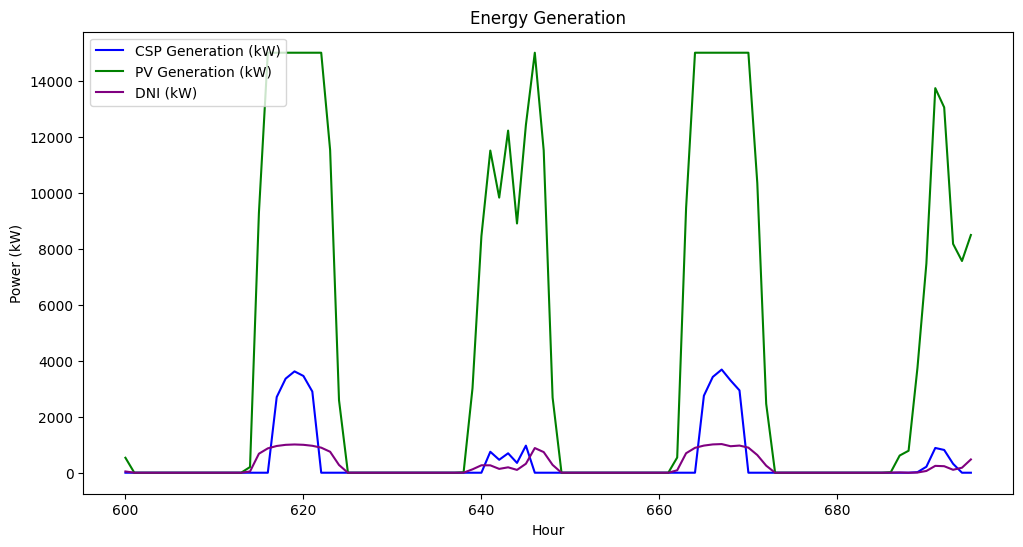

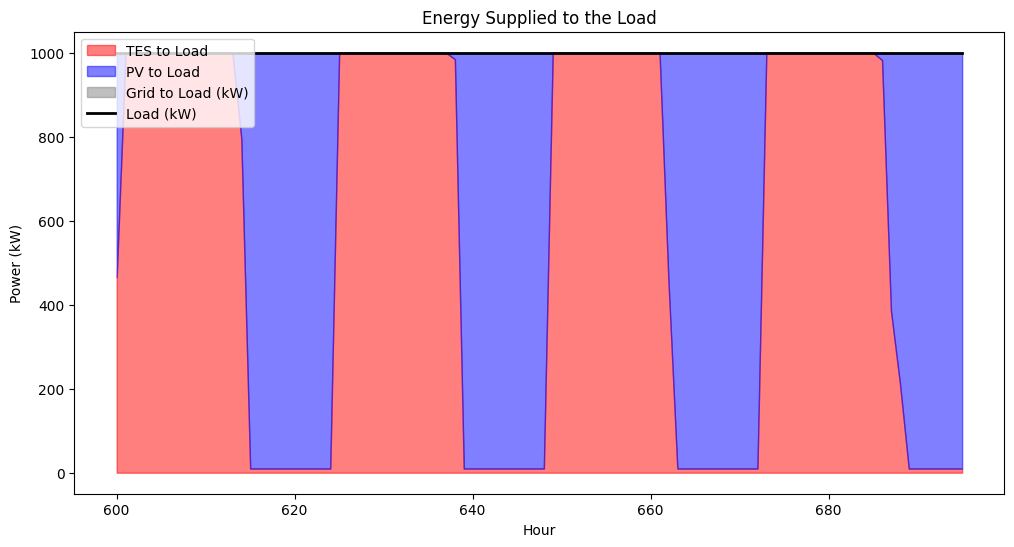

600


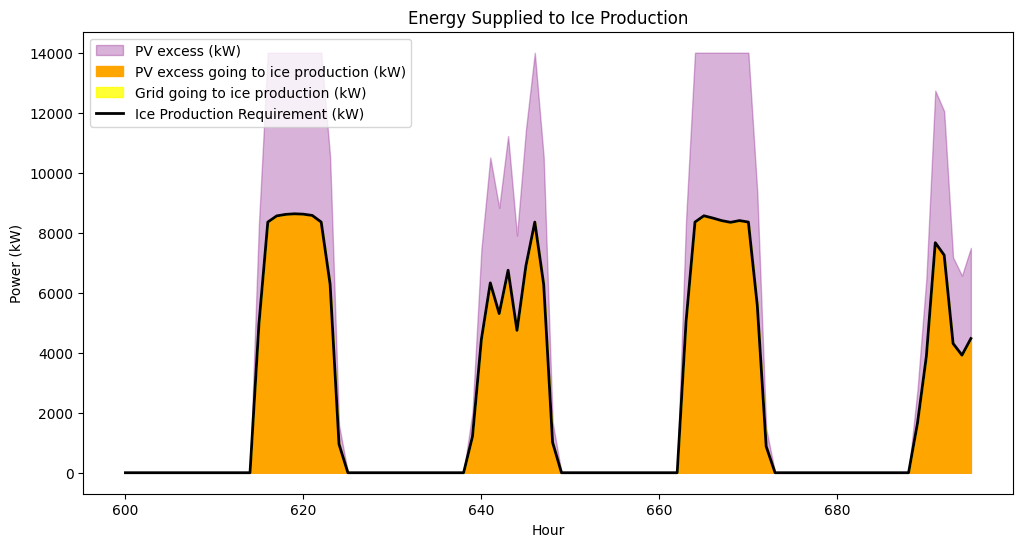

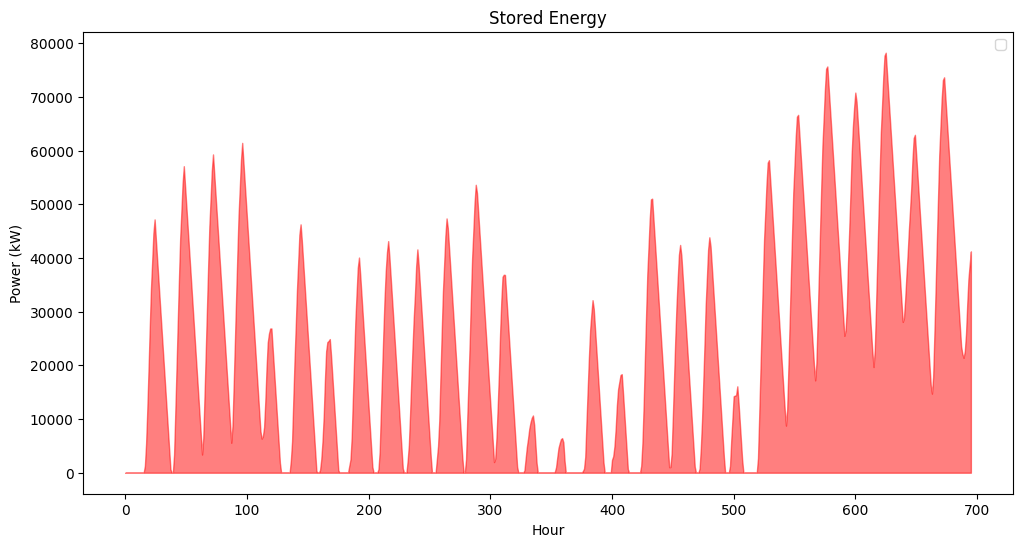

Scenario 4
LCOE: 0.28 $/kWh
load met percentage: 96.15


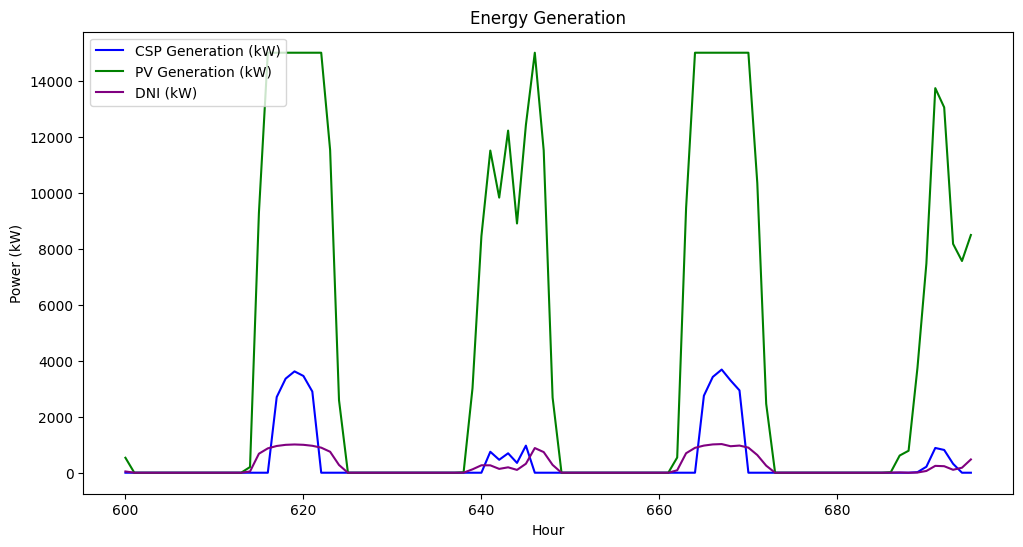

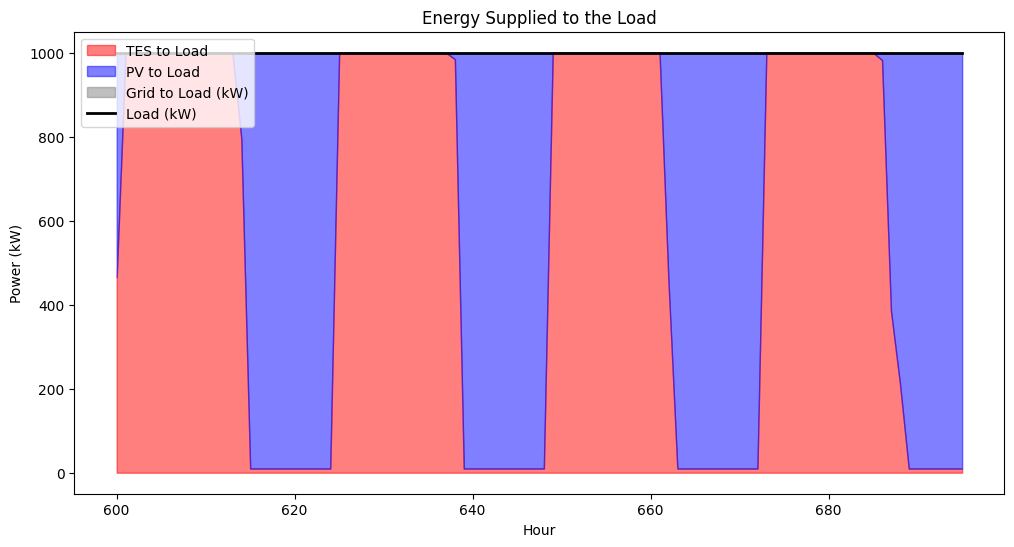

600


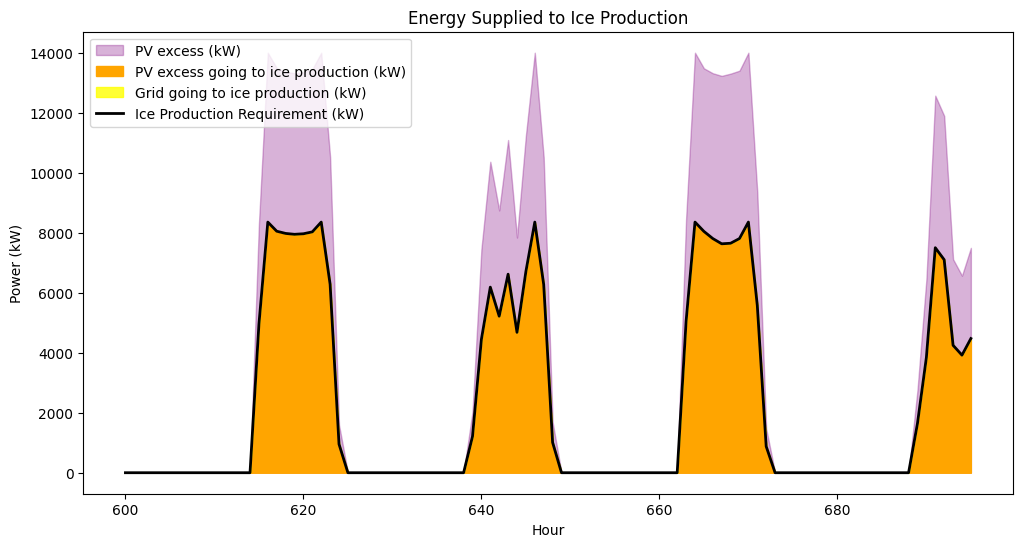

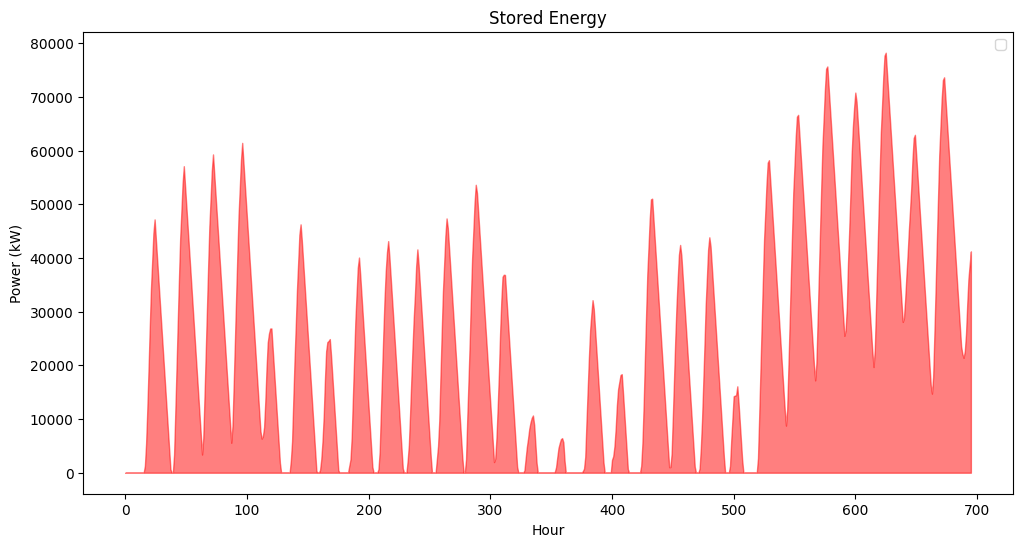

In [26]:
# scenario 1: gridtied, original TES logic (excess PV to TES (charge_tes_with_pv_excess = True))
# scenario 2: gridtied, original TES logic (excess PV to ice (charge_tes_with_pv_excess = False))
# scenario 3: gridtied, updated TES logic (excess PV to 1/4 elec, 3/4 ice making)
# scenario 4: isolated, updated TES logic (excess PV to 1/4 elec, 3/4 ice making)

days = 4
startday = 25
plant_location = 'Page, AZ'
load_int = 1e6
collector_area = 6000 #m2
pv_capacity = 15e6
tes_capacity = 10e7
maximum_hourly_tes_output = load_int

# scenario 1
print('Scenario 1')
plot_performance(load = load_int, plant_location = plant_location, gridtied = True, original_TES = True, charge_tes_with_pv_excess = True, collector_area = collector_area, tes_capacity = tes_capacity, pv_capacity = pv_capacity,maximum_hourly_tes_output = maximum_hourly_tes_output, days = days, startday = startday)

# scenario 2
print('Scenario 2')
plot_performance(load = load_int, plant_location = plant_location, gridtied = True, original_TES = True, charge_tes_with_pv_excess = False, collector_area = collector_area, tes_capacity = tes_capacity, pv_capacity = pv_capacity,maximum_hourly_tes_output = maximum_hourly_tes_output, days = days, startday = startday)

# scenario 3
print('Scenario 3')
plot_performance(load = load_int, plant_location = plant_location, gridtied = True, original_TES = False, charge_tes_with_pv_excess = False, collector_area = collector_area, tes_capacity = tes_capacity, pv_capacity = pv_capacity,maximum_hourly_tes_output = maximum_hourly_tes_output, days = days, startday = startday)

# scenario 4
print('Scenario 4')
plot_performance(load =load_int , plant_location = plant_location, gridtied = False, original_TES = False, charge_tes_with_pv_excess = False, collector_area = collector_area, tes_capacity = tes_capacity, pv_capacity = pv_capacity,maximum_hourly_tes_output = maximum_hourly_tes_output, days = days, startday = startday)

In [ ]:
parametric_plots(load = load_int, plant_location = plant_location, gridtied = True, n_data_points = 12, original_TES = False, csv_name = r'C:\Users\tljohn\gridtied_updated_TES_scenarios3_2.csv')

In [ ]:
parametric_plots(load = load_int, plant_location = plant_location, gridtied = False, n_data_points = 12, original_TES = True, csv_name = r'C:\Users\tljohn\isolated_scenario4_2.csv')